In [1]:
####### Approach Explanation #######
'''
Answering each question with the code implmentation in each cell 

'''


########Load Libraries#######

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler # using standard scaler as data for most features is normally distributed
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from math import sqrt 
from time import gmtime, strftime

%matplotlib inline

######## Capture the start time to check the runt ime of the whole notebook #########
startTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())

C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
####################################
#           Question 1             #
####################################
'''
What are the different types of variables are present in the dataset? 

Ans - We have both categorical and numerical data present in the dataset . Categories as below

CATEGORICAL - Nominal

-->Income , Workclass , martial-status , occupation , relationship , race , sex , native-country

CATEGORICAL - Ordinal 

--> education  

NUMERICAL - Interval

--> hours-per-week

NUMERICAL - Ratio

--> Age(continuous),fnlwgt(continuous) , education-num (continuous) , capital-gain(continuous) , capital-loss(continuous)

'''

'\nWhat are the different types of variables are present in the dataset? \n\nAns - We have both categorical and numerical data present in the dataset . Categories as below\n\nCATEGORICAL - Nominal\n\n-->Income , Workclass , martial-status , occupation , relationship , race , sex , native-country\n\nCATEGORICAL - Ordinal \n\n--> education  \n\nNUMERICAL - Interval\n\n--> hours-per-week\n\nNUMERICAL - Ratio\n\n--> Age(continuous),fnlwgt(continuous) , education-num (continuous) , capital-gain(continuous) , capital-loss(continuous)\n\n'



Head data 

     age         workclass  fnlwgt     education  education-num  \
0    50  Self-emp-not-inc   83311     Bachelors             13   
1    38           Private  215646       HS-grad              9   
2    53           Private  234721          11th              7   
3    28           Private  338409     Bachelors             13   
4    37           Private  284582       Masters             14   
5    49           Private  160187           9th              5   
6    52  Self-emp-not-inc  209642       HS-grad              9   
7    31           Private   45781       Masters             14   
8    42           Private  159449     Bachelors             13   
9    37           Private  280464  Some-college             10   
10   30         State-gov  141297     Bachelors             13   
11   23           Private  122272     Bachelors             13   
12   32           Private  205019    Assoc-acdm             12   
13   40           Private  121772     Assoc-voc             1

32559  United-States   >50K  


Describe data 

                 age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


Null values 

dtype: object


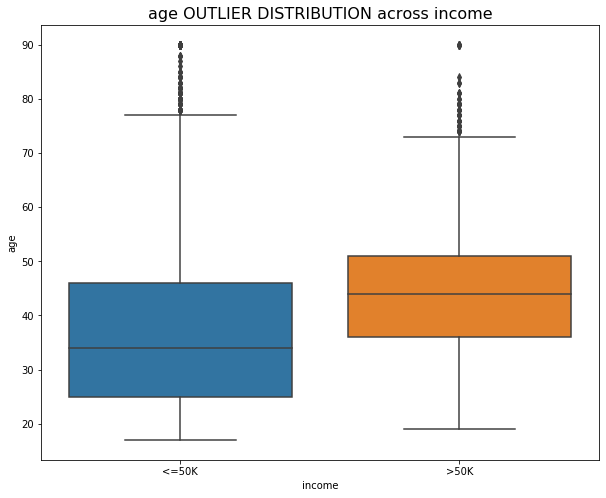

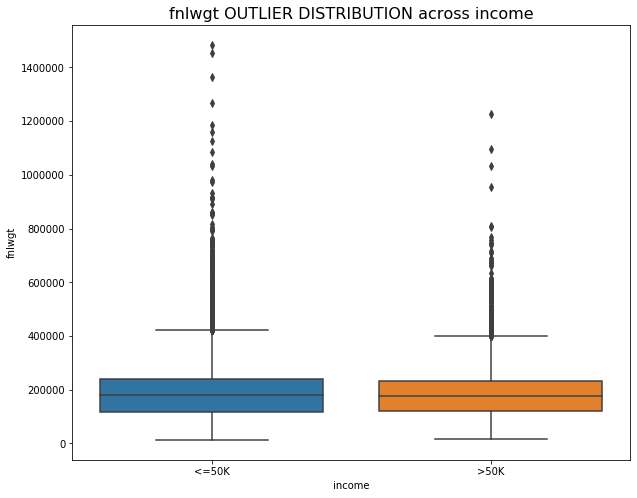

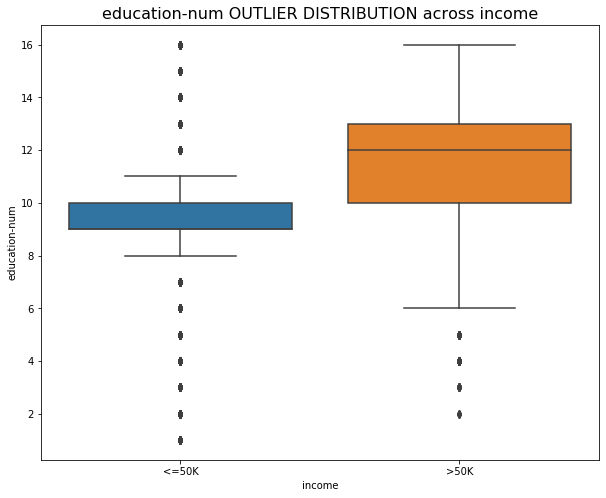

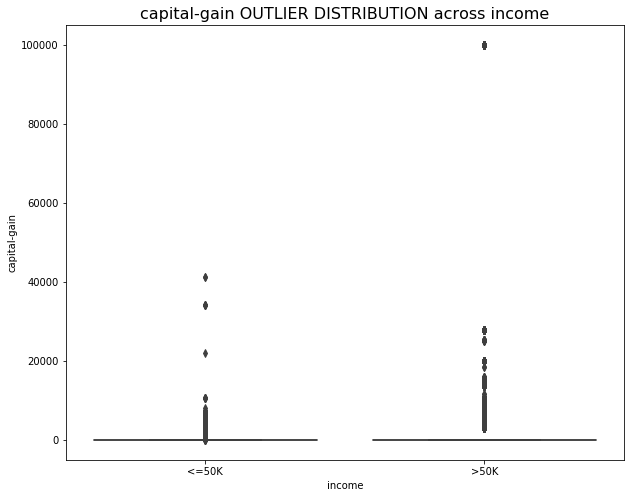

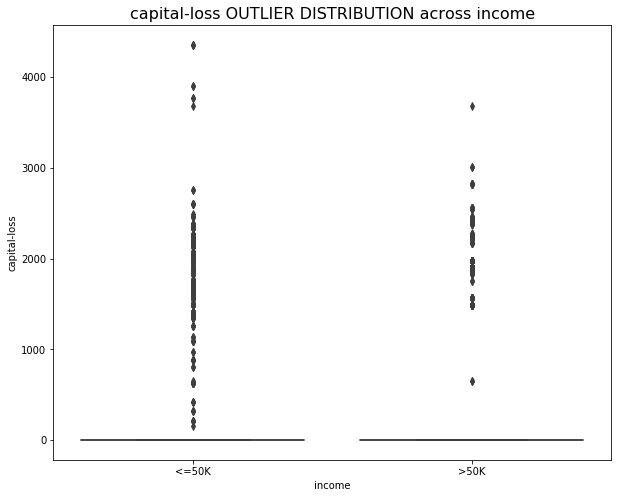

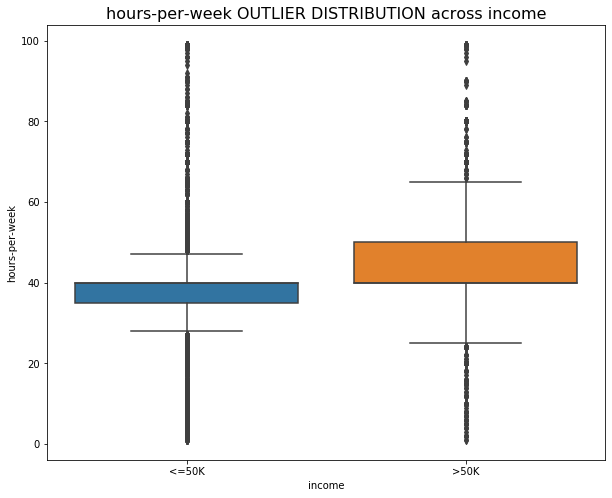

In [3]:

####################################
#           Question 1             #
####################################

'''
Construct a data frame of first 20 and last records of the dataset. 
'''

####################################
#           EDA Starts             #
####################################

######## Load Data ########

BASE_PATH = './'
os.listdir(BASE_PATH)

df_load_features = pd.read_csv(os.path.join(BASE_PATH, 'adult.data'),skipinitialspace=True)

######## Create the headers ########

headers = ["age","workclass","fnlwgt","education", "education-num","marital-status",
         "occupation","relationship","race", "sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
df_load_features.columns = headers

######## Replace invalid character ? ########

df_load_features.replace("?", np.nan, inplace = True)

######## print quality of data ########

print("\n\nHead data \n\n",df_load_features.head(20))
print("\n\nTail data \n\n",df_load_features.tail(20))
print("\n\nDescribe data \n\n",df_load_features.describe())
print("\n\nNull values present:  ",df_load_features.isnull().values.any())
print("\n\nLength of dataframe:",len(df_load_features))

######## Drop duplicate rows whereever found  ########

duplicate_df = df_load_features[df_load_features.duplicated()] 
  
print("\n\nDuplicate Rows :\n\n" , duplicate_df) 
print("\n\ncount of duplicate rows :" , len(duplicate_df))

df_load_features.drop_duplicates(keep=False,inplace=True) 
print("\n\nlength of dataframe after dropping duplicates:",len(df_load_features))

######## Manage missing values and replace by mode to keep the data consistent ########

for column in df_load_features:
    print("\n\nmode of column: {} is {}".format(column,df_load_features[column].value_counts().idxmax()))
    df_load_features[column].replace(np.nan, df_load_features[column].value_counts().idxmax(), inplace = True)
print("\n\nAll misisng values replaced by mode")
print("\n\nIs any null value present after replacing the missing values:  ",df_load_features.isnull().values.any())

######## Drop na columns if still present #########

df_load_features = df_load_features.dropna()

######## Data transformation to set the dataframe in the right format #########

print("\ndata types of dataframe\n",df_load_features.dtypes) #print data types

df_load_features_raw = df_load_features.copy() # Store non transformed data in another dataframe for future use

df_load_features.drop("education", axis = 1, inplace=True) #Drop education column as education-num is present
df_load_features.loc[:, 'workclass'] = df_load_features.loc[:, 'workclass'].map({'Private':0,'Self-emp-not-inc':1, 'Self-emp-inc':2, 'Federal-gov':3, 'Local-gov':4
                                                                   , 'State-gov':5, 'Without-pay':6, 'Never-worked':7})
df_load_features.loc[:, 'marital-status'] = df_load_features.loc[:, 'marital-status'].map({'Married-civ-spouse':0, 'Divorced':1, 'Never-married':2, 'Separated':3
                                                                           , 'Widowed':4, 'Married-spouse-absent':5, 'Married-AF-spouse':6})
df_load_features.loc[:, 'occupation'] = df_load_features.loc[:, 'occupation'].map({'Tech-support':0, 'Craft-repair':1, 'Other-service':2
                                                                     , 'Sales':3, 'Exec-managerial':4, 'Prof-specialty':5,
                                                                     'Handlers-cleaners':6, 'Machine-op-inspct':7, 
                                                                     'Adm-clerical':8, 'Farming-fishing':9, 
                                                                     'Transport-moving':10, 'Priv-house-serv':11,
                                                                     'Protective-serv':12, 'Armed-Forces':13})
df_load_features.loc[:, 'relationship'] = df_load_features.loc[:, 'relationship'].map({'Wife':0, 'Own-child':1, 'Husband':2, 'Not-in-family':3, 'Other-relative':4,
                                                                         'Unmarried':5})
df_load_features.loc[:, 'race'] = df_load_features.loc[:, 'race'].map({'White':0, 'Asian-Pac-Islander':1, 'Amer-Indian-Eskimo':2
                                                         , 'Other':3, 'Black':4})
df_load_features.loc[:, 'sex'] = df_load_features.loc[:, 'sex'].map({'Female': 0 ,'Male': 1}) 
df_load_features.loc[:, 'native-country'] = df_load_features.loc[:, 'native-country'].map({'United-States':0, 'Cambodia':1, 'England':2, 'Puerto-Rico':3, 'Canada':4
                                                                             , 'Germany':5, 'Outlying-US(Guam-USVI-etc)':6, 'India':7, 
                                                                             'Japan':8, 'Greece':9, 'South':10, 'China':11, 'Cuba':12, 'Iran':13, 'Honduras':14
                                                                             , 'Philippines':15, 'Italy':16, 'Poland':17, 'Jamaica':18, 'Vietnam':19,
                                                                             'Mexico':20, 'Portugal':21, 'Ireland':22, 'France':23, 'Dominican-Republic':24,
                                                                           'Laos':25, 'Ecuador':26, 'Taiwan':27, 'Haiti':28, 'Columbia':29, 
                                                                             'Hungary':30, 'Guatemala':31, 'Nicaragua':32, 'Scotland':33, 'Thailand':34, 'Yugoslavia':35, 'El-Salvador':36,
                                                                             'Trinadad&Tobago':37, 'Peru':38, 'Hong':39, 'Holand-Netherlands':40})
df_load_features.loc[:, 'income'] = df_load_features.loc[:, 'income'].map({'>50K': 0, '<=50K': 1}) 


df_load_features[["workclass", "marital-status","occupation","relationship","race"
    ,"sex","native-country","income"]] = df_load_features[["workclass", "marital-status","occupation","relationship","race","sex","native-country","income"]].astype("int") #convert datatypes to int for categorical columns

#print(df_load_features_raw.head())


######## Finding outliers for numerical variables against income #########


tmp_df = df_load_features_raw.loc[:, ["age","fnlwgt", "education-num","capital-gain","capital-loss","hours-per-week"
                                      ,"income"]]
for column in tmp_df:
    if column!='income':
        plt.figure(figsize=(10, 8))
        plt.title('{} OUTLIER DISTRIBUTION across income'.format(column), fontsize=16)
        sn.boxplot(x="income",y=column,data=tmp_df)
        plt.show()


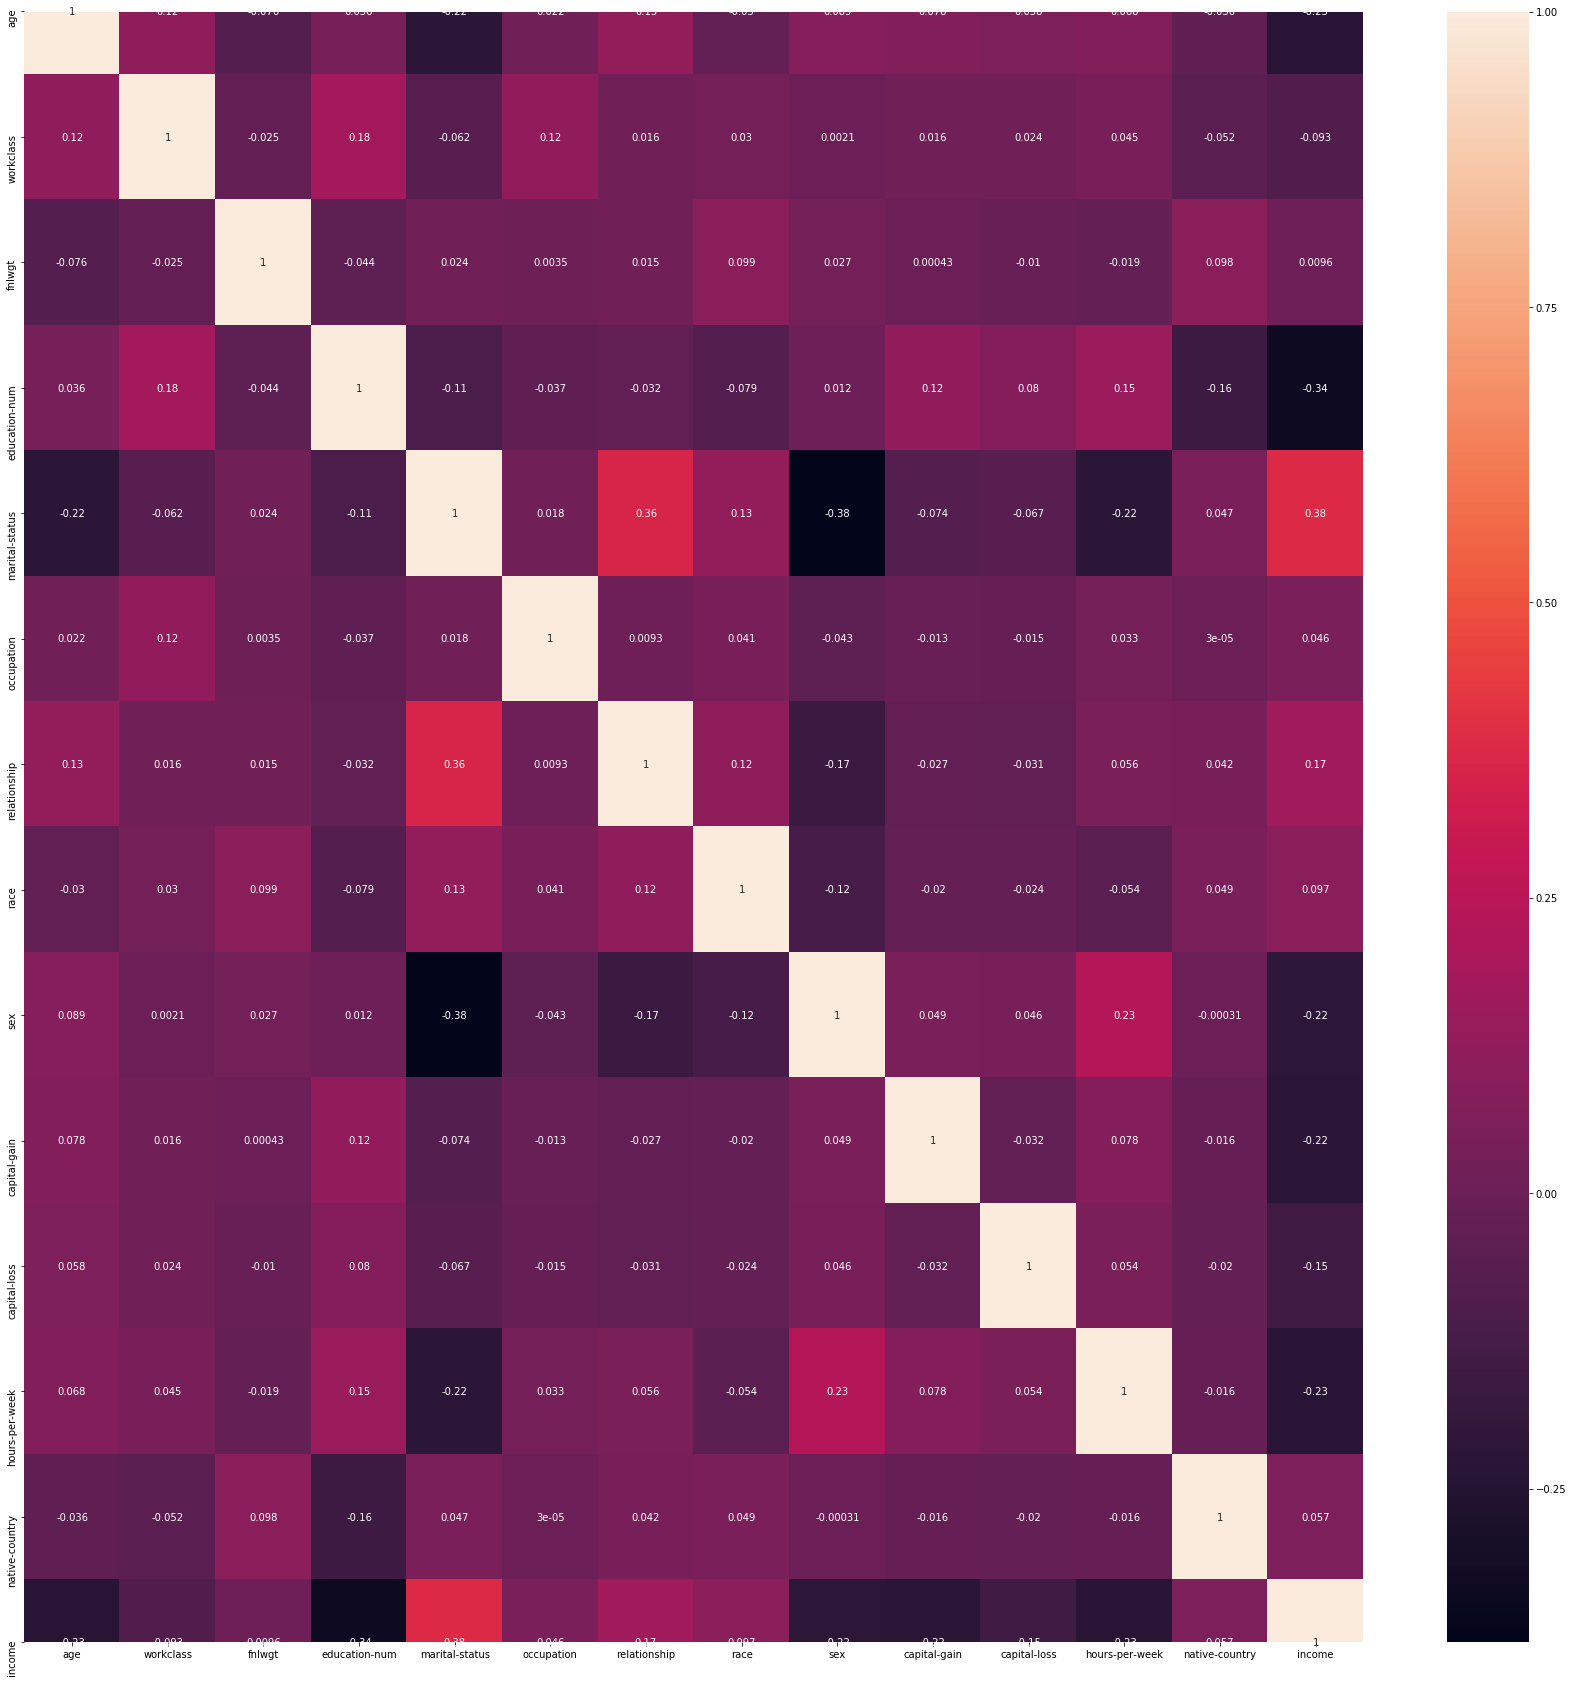

In [4]:
####################################
#           Question 2             #
####################################
'''
Investigate the presence of correlated variables.

'''

######## Check feature correlation #########

plt.figure(figsize=(30, 30))
sn.heatmap(df_load_features.corr(), annot=True)
plt.show()

'\na.Discuss the relationship, if any, each of these variables has with the target variable.\nb.Which variables would you expect to make a significant appearance in any data mining classification model?\n\nAnswers\na.  sex has a postive relationship as in they help in increasing the income whereas maritial status \n  , relationship have a negative relationship and decrease the income\n\nb. Categorical variables and numeric discrete variables will have a significant impact on any classification model\n'

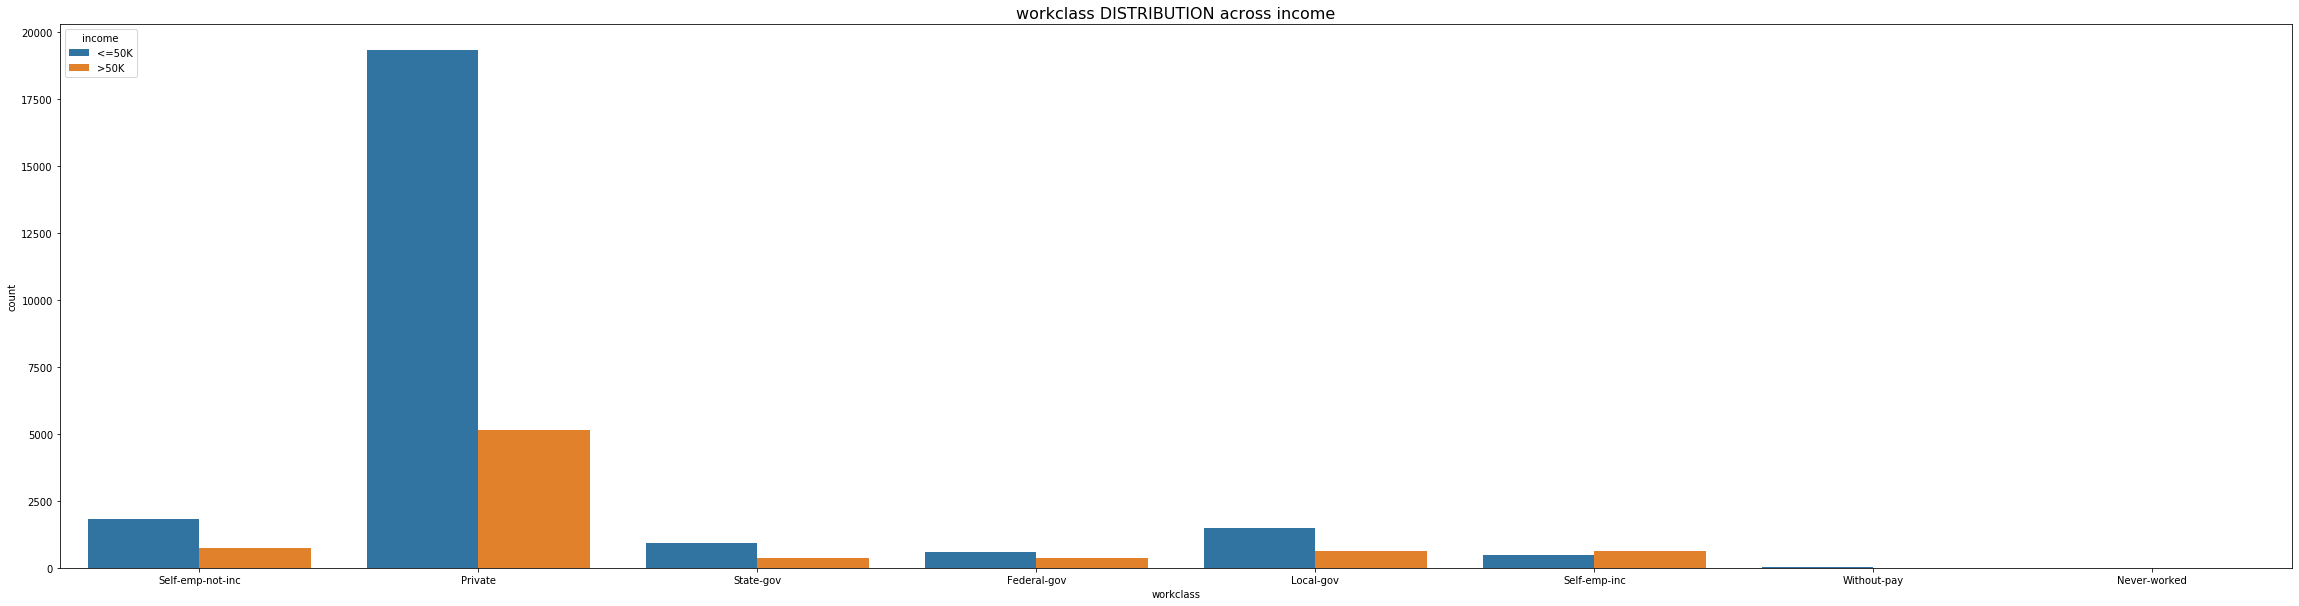

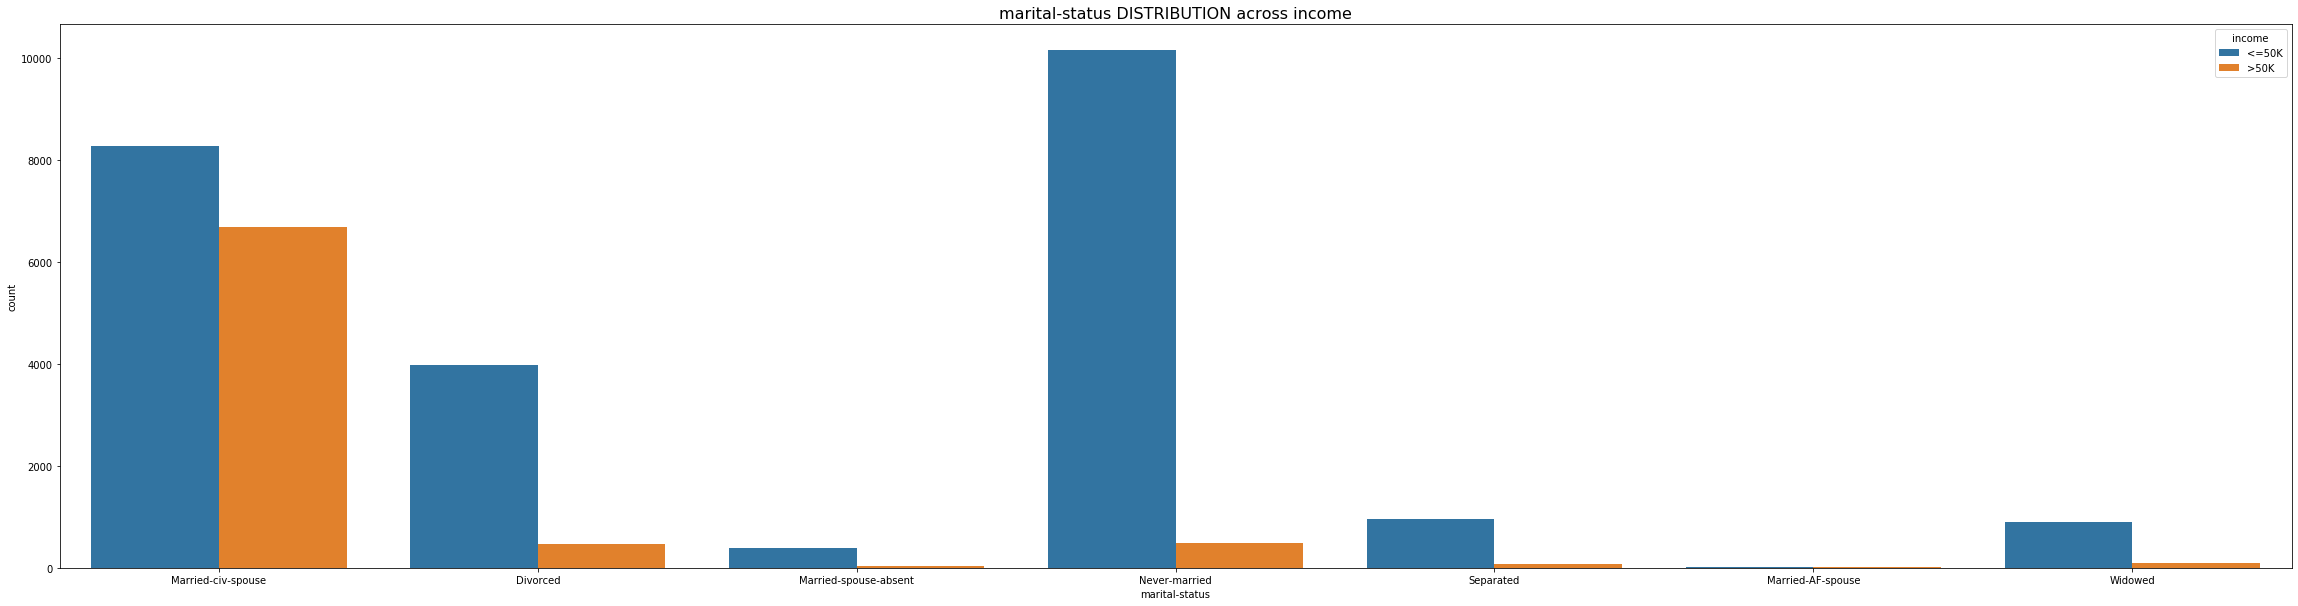

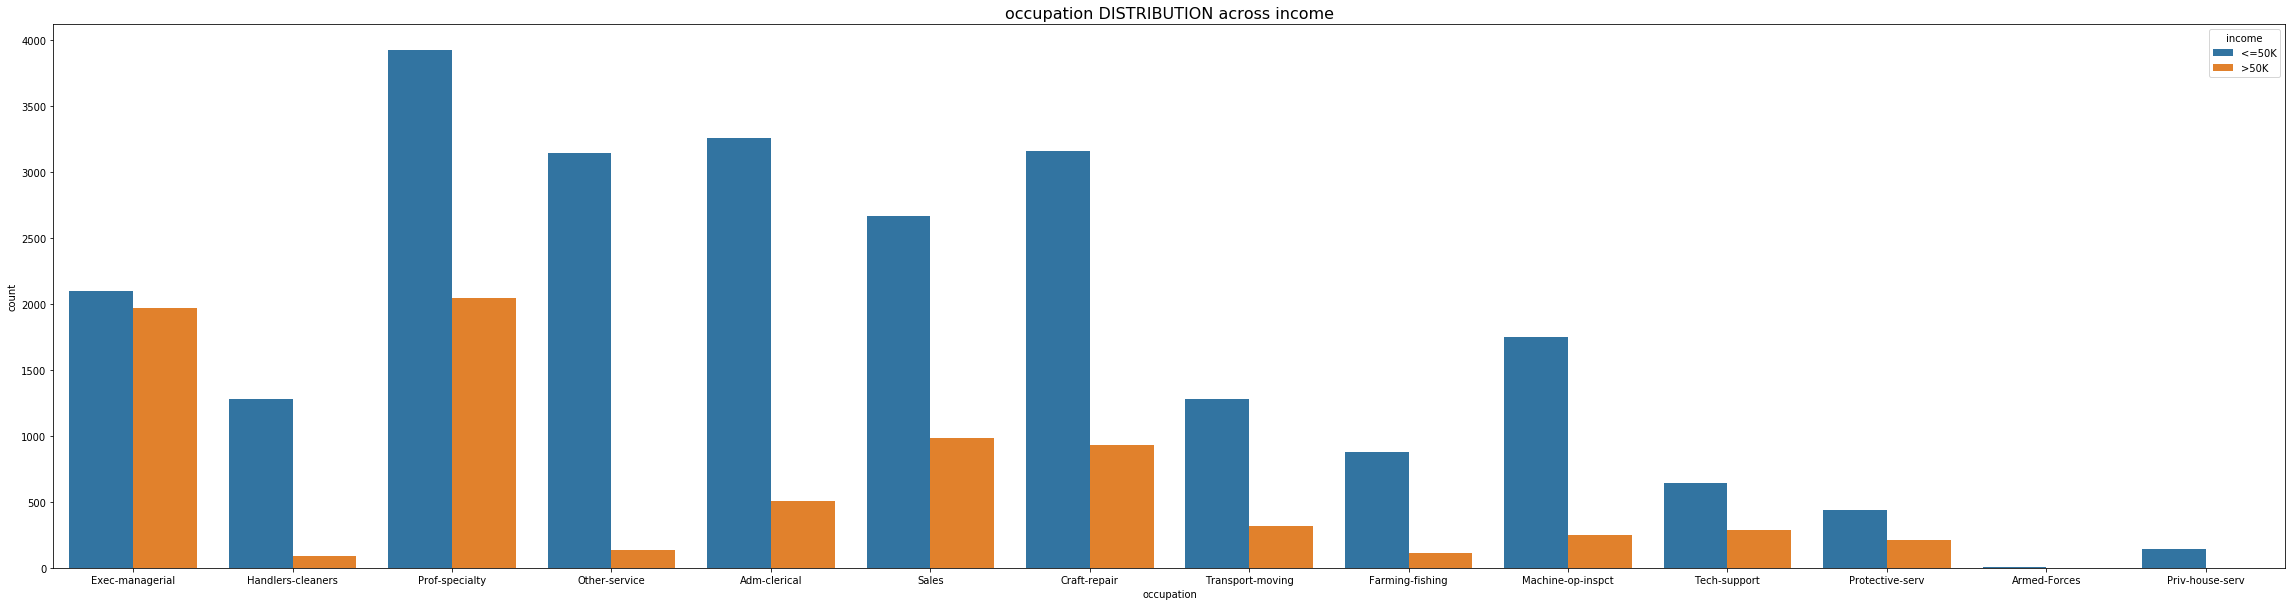

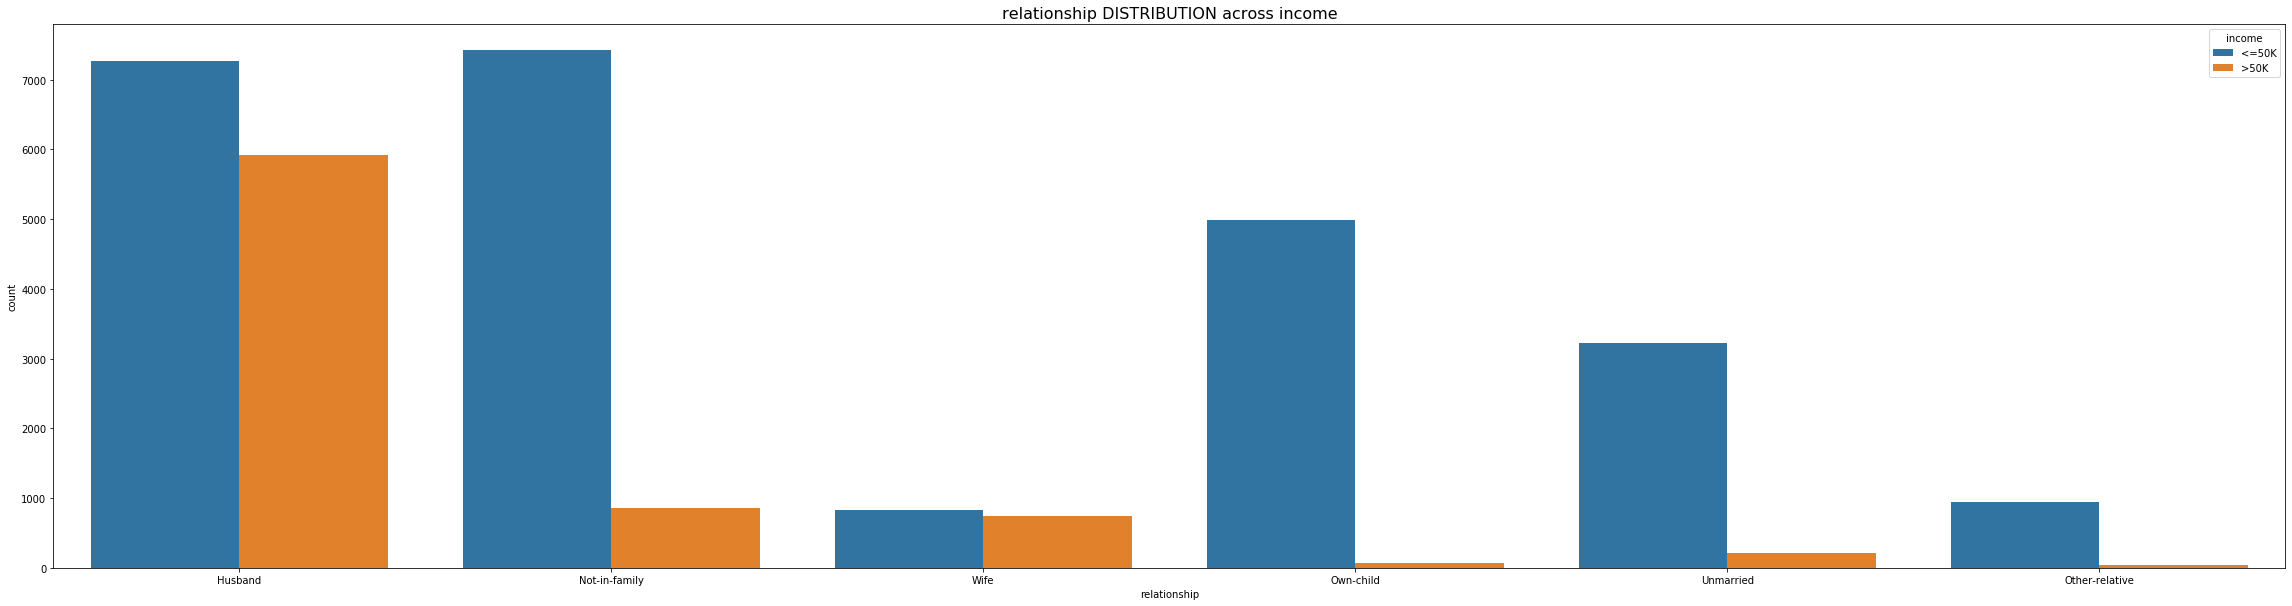

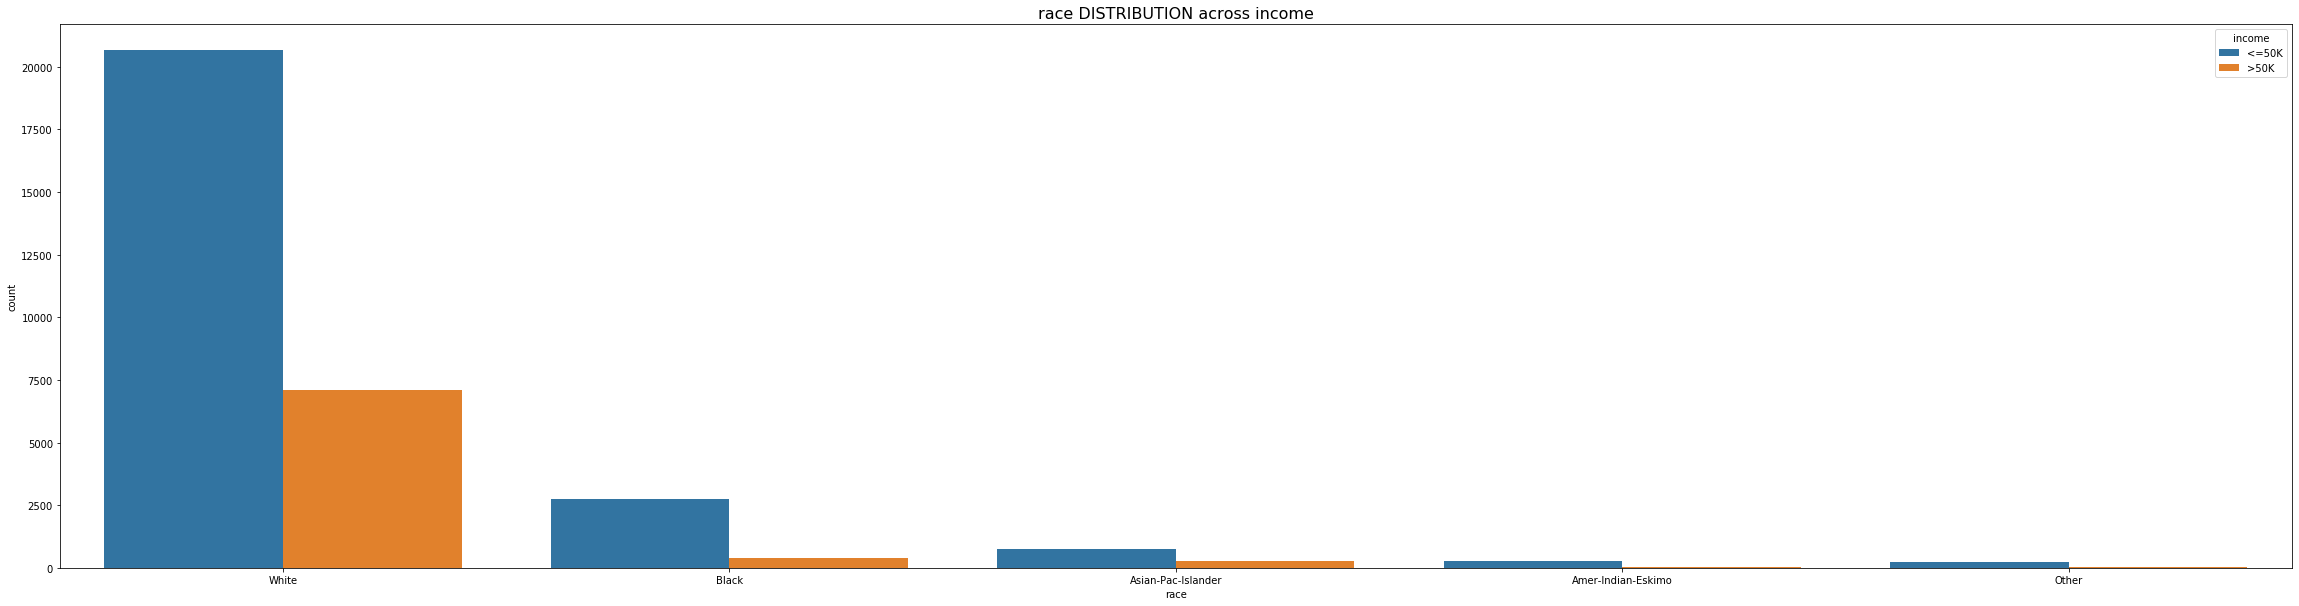

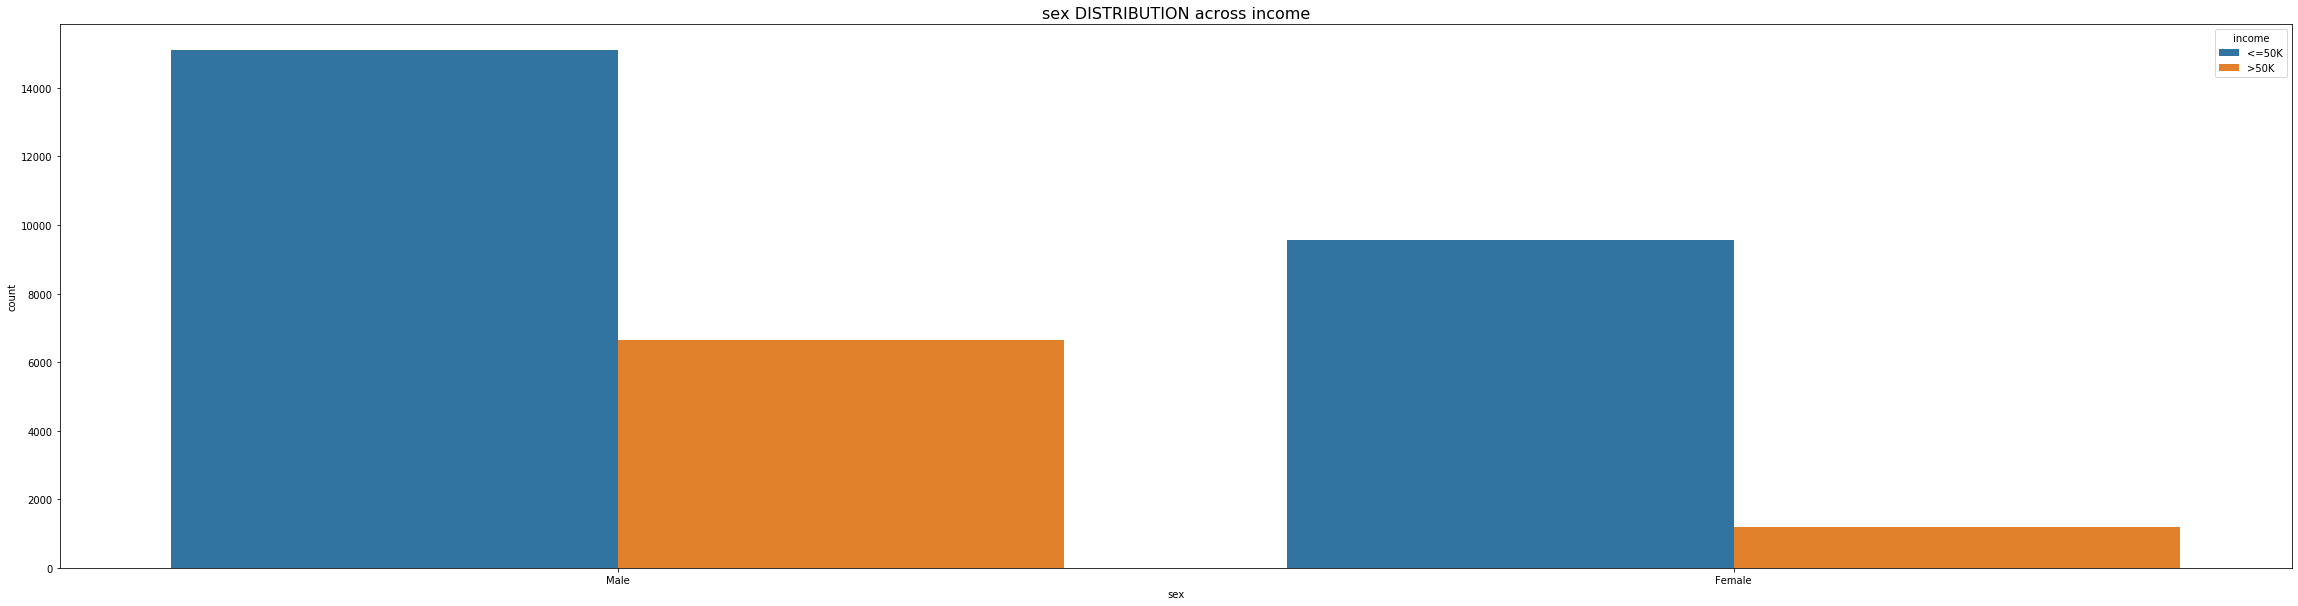

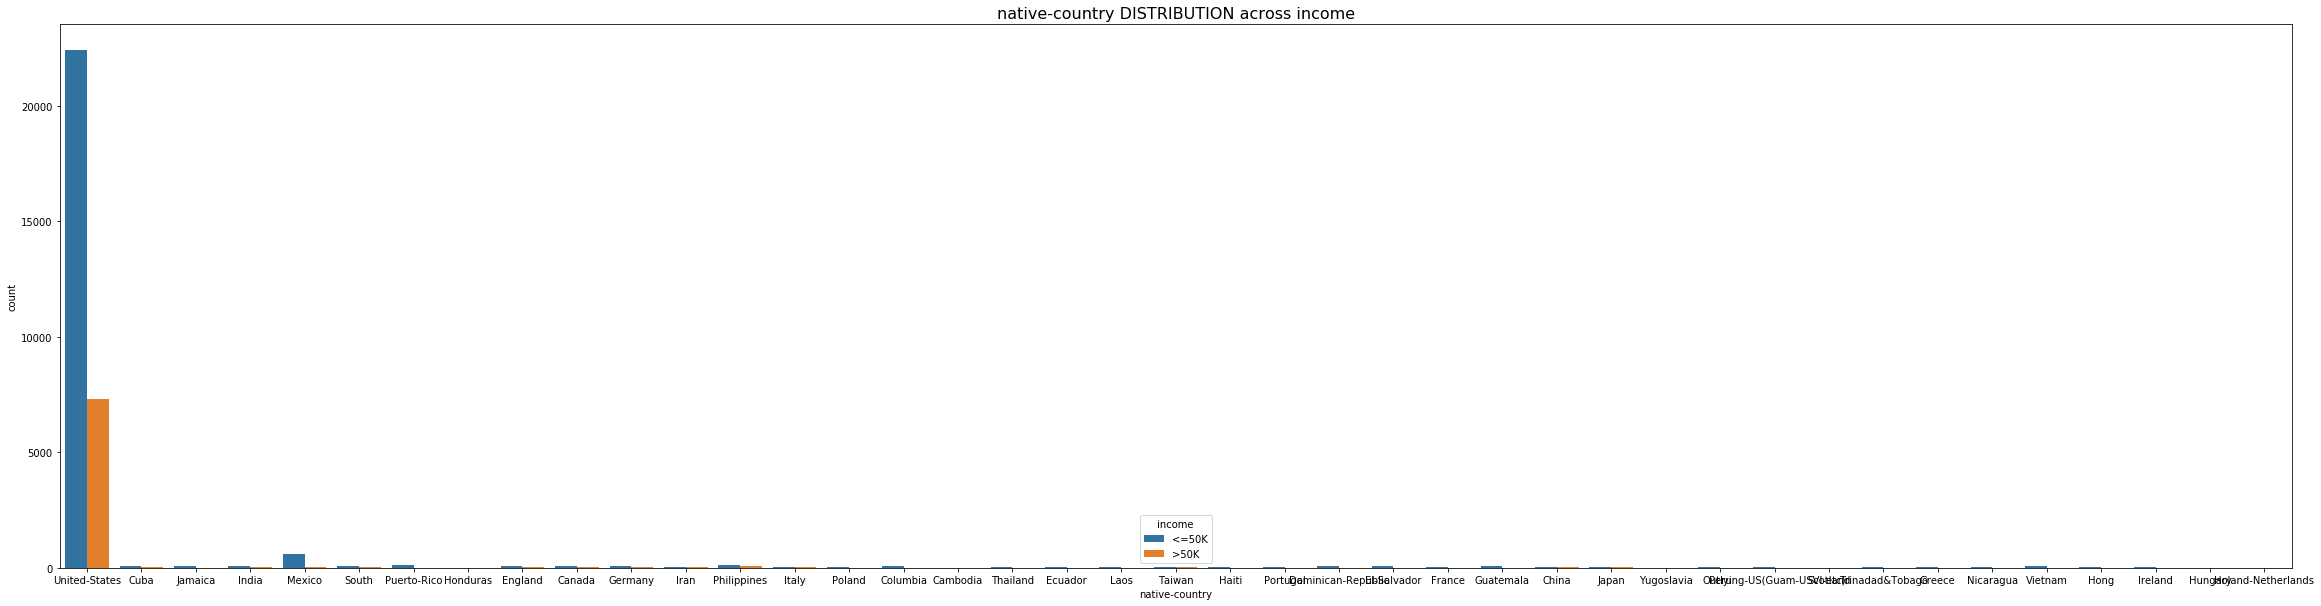

In [5]:
####################################
#           Question 3             #
####################################
'''
For each of the categorical variables, construct a bar chart of the variable, with an overlay of the target variable. Normalize if necessary.

'''
 ###### creating the bar plots for categorical variables vs income ######
    
tmp_df = df_load_features_raw.loc[:, ["workclass", "marital-status","occupation","relationship","race"
    ,"sex","native-country","income"]]
for column in tmp_df:
    if column!='income':
        plt.figure(figsize=(40, 10))
        plt.title('{} DISTRIBUTION across income'.format(column), fontsize=16)
        sn.countplot(x=column,hue='income',data=tmp_df)
'''
a.Discuss the relationship, if any, each of these variables has with the target variable.
b.Which variables would you expect to make a significant appearance in any data mining classification model?

Answers
a.  sex has a postive relationship as in they help in increasing the income whereas maritial status 
  , relationship have a negative relationship and decrease the income

b. Categorical variables and numeric discrete variables will have a significant impact on any classification model
'''


education         10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  \
workclass                                                            
Federal-gov          6     9     5        0        1        2    3   
Local-gov           31    36    19        4        9       28   23   
Never-worked         2     1     0        0        0        1    0   
Private            795  1041   373      145      294      494  438   
Self-emp-inc        19    14     7        2        4       14   10   
Self-emp-not-inc    67    60    19       13       19       94   34   
State-gov           13    14    10        1        4       10    6   
Without-pay          0     0     0        0        0        1    0   

education         Assoc-acdm  Assoc-voc  Bachelors  Doctorate  HS-grad  \
workclass                                                                
Federal-gov               55         38        212         16      263   
Local-gov                 88         86        477         27      503   
Nev

Without-pay                        0                   1      1      0     12
sex               Female   Male
workclass                      
Federal-gov          315    645
Local-gov            835   1258
Never-worked           2      5
Private             8574  15913
Self-emp-inc         135    981
Self-emp-not-inc     399   2140
State-gov            489    808
Without-pay            5      9
native-country    Cambodia  Canada  China  Columbia  Cuba  Dominican-Republic  \
workclass                                                                       
Federal-gov              1       2      1         2     2                   0   
Local-gov                0       6      3         0     4                   3   
Never-worked             0       0      0         0     0                   0   
Private                 17      93     56        49    72                  63   
Self-emp-inc             0       6      1         0     9                   2   
Self-emp-not-inc         1      11 

Some-college   1009           271               283  
relationship  Husband  Not-in-family  Other-relative  Own-child  Unmarried  \
education                                                                    
10th              313            210              43        225        113   
11th              311            211              59        426        138   
12th              103             97              23        154         38   
1st-4th            70             47              16          9         19   
5th-6th           149             68              40         15         45   
7th-8th           331            138              33         49         73   
9th               202            111              30         80         70   
Assoc-acdm        380            331              15        131        134   
Assoc-voc         596            351              24        144        184   
Bachelors        2433           1660              87        523        342   
Doctorate 

[16 rows x 41 columns]
occupation             Adm-clerical  Armed-Forces  Craft-repair  \
marital-status                                                    
Divorced                        817             0           464   
Married-AF-spouse                 5             0             3   
Married-civ-spouse              986             3          2556   
Married-spouse-absent            59             0            52   
Never-married                  1588             6           870   
Separated                       147             0           103   
Widowed                         163             0            41   

occupation             Exec-managerial  Farming-fishing  Handlers-cleaners  \
marital-status                                                               
Divorced                           604               64                128   
Married-AF-spouse                    1                1                  0   
Married-civ-spouse                2444              575      

[7 rows x 41 columns]
relationship       Husband  Not-in-family  Other-relative  Own-child  \
occupation                                                             
Adm-clerical           608           1162             133        770   
Armed-Forces             2              4               2          1   
Craft-repair          2503            834             100        380   
Exec-managerial       2187            991              48        235   
Farming-fishing        554            179              31        148   
Handlers-cleaners      437            307              91        418   
Machine-op-inspct      887            459              76        263   
Other-service          516            957             190        889   
Priv-house-serv          0             61              19         22   
Prof-specialty        2291           1707             121        857   
Protective-serv        372            140              13         80   
Sales                 1506            881 

[14 rows x 41 columns]
race            Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
relationship                                                               
Husband                         92                 410    671     80  11928
Not-in-family                   81                 212    810     73   7103
Other-relative                  13                  82    164     28    694
Own-child                       48                 173    553     37   4249
Unmarried                       58                  91    769     37   2489
Wife                            19                  69    153     16   1311
sex             Female   Male
relationship                 
Husband              1  13180
Not-in-family     3864   4415
Other-relative     430    551
Own-child         2241   2819
Unmarried         2652    792
Wife              1566      2
native-country  Cambodia  Canada  China  Columbia  Cuba  Dominican-Republic  \
relationship                                      

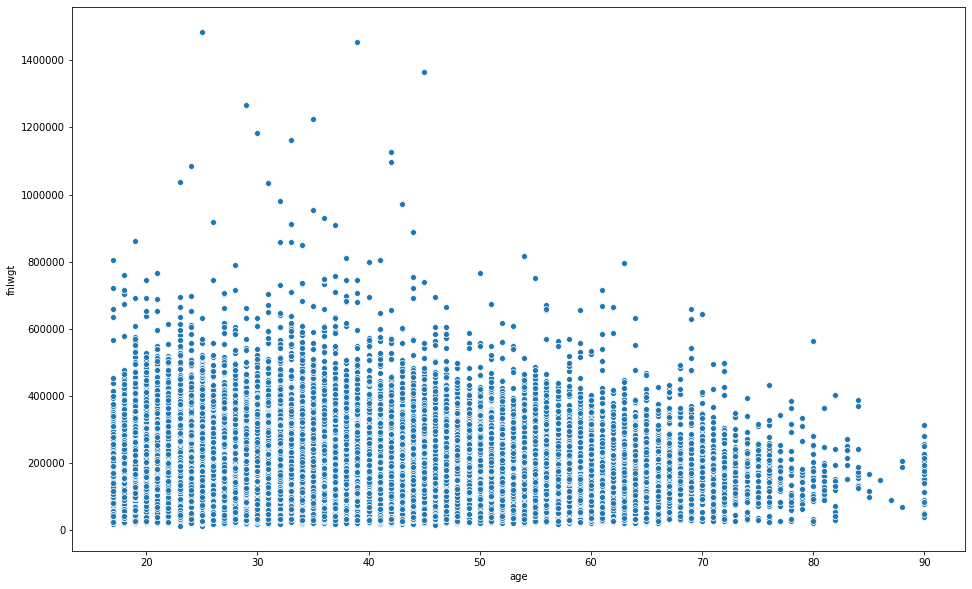

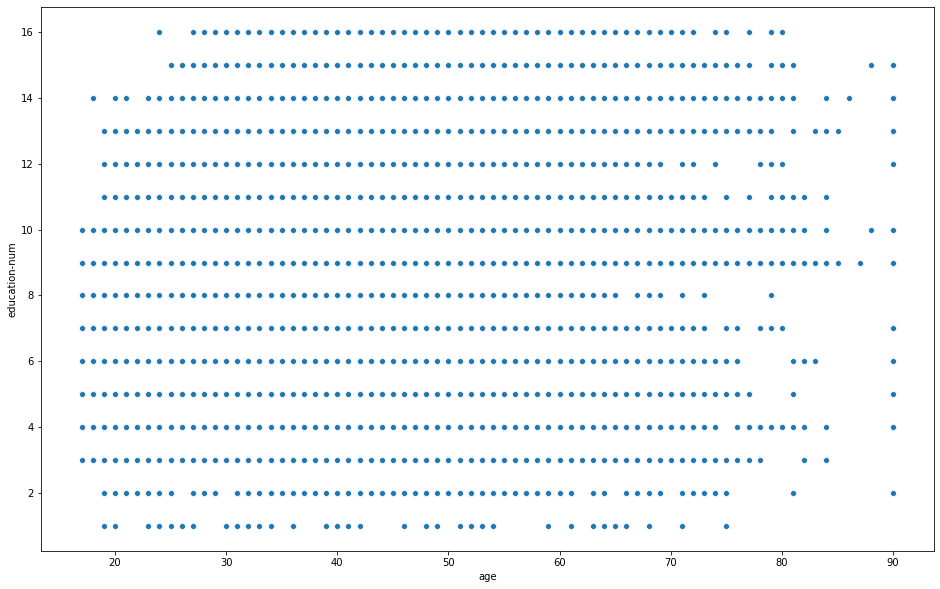

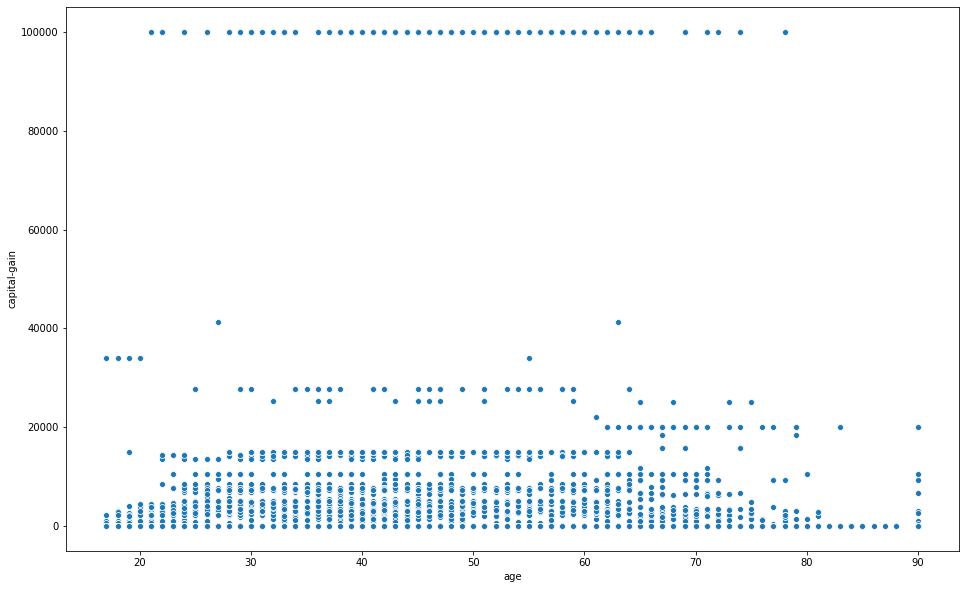

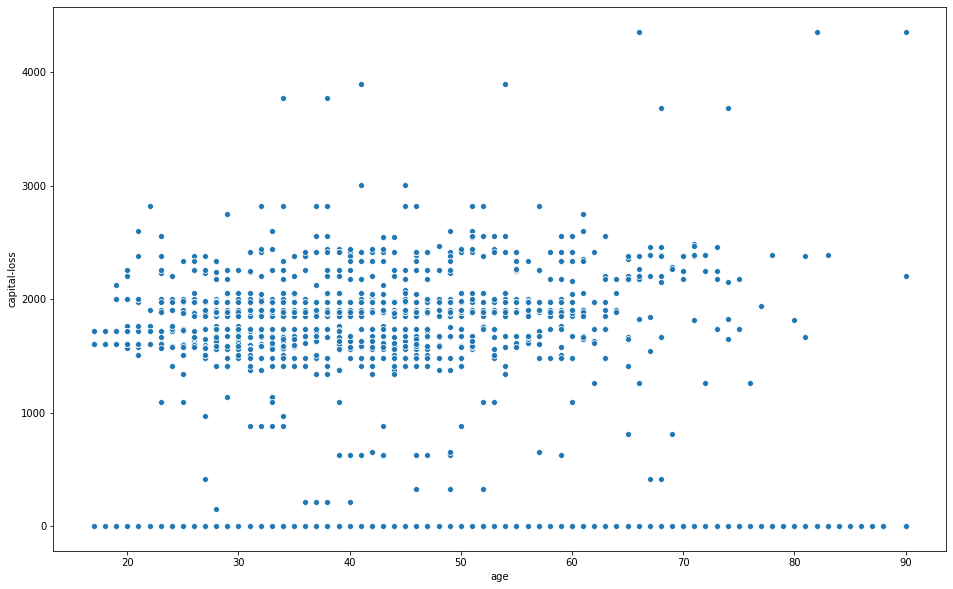

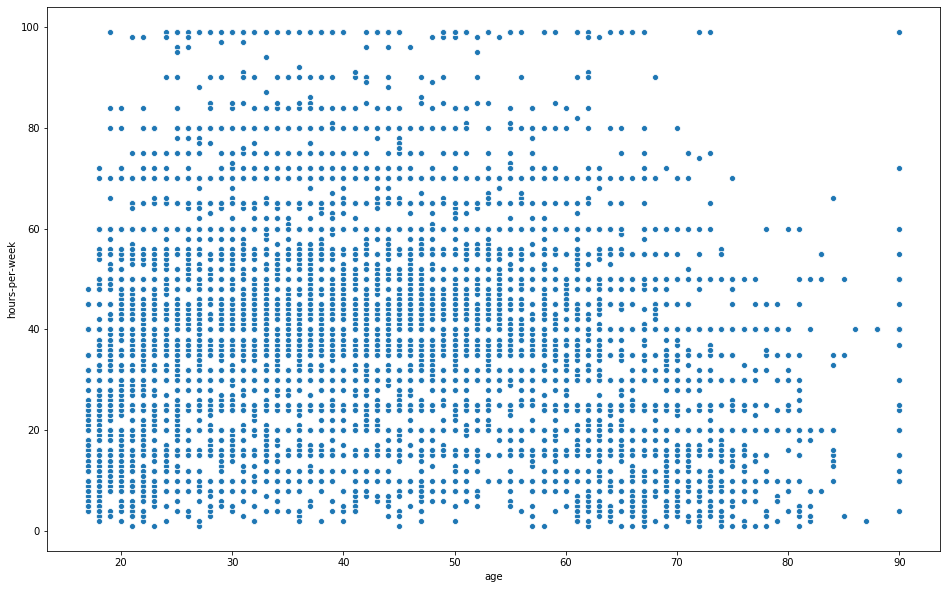

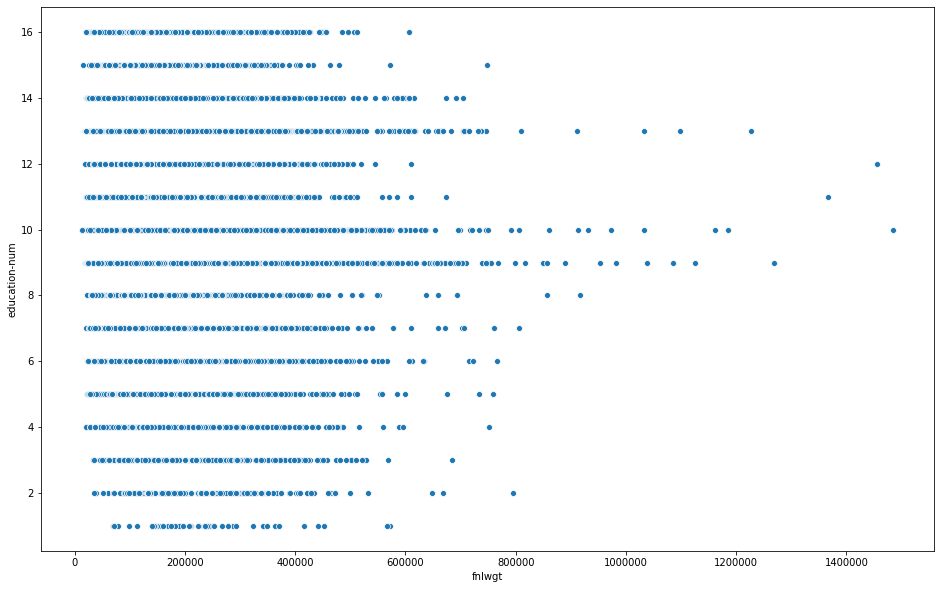

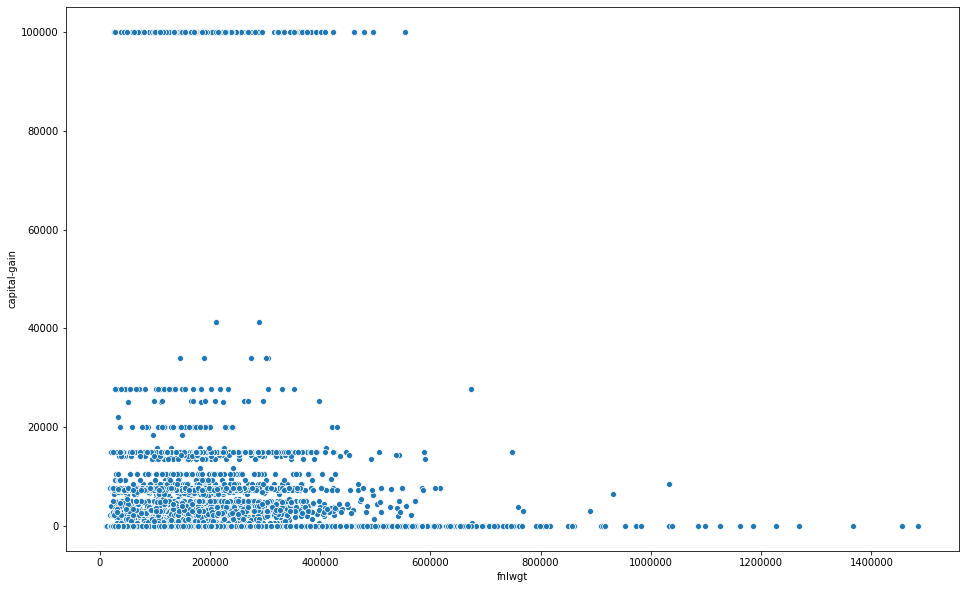

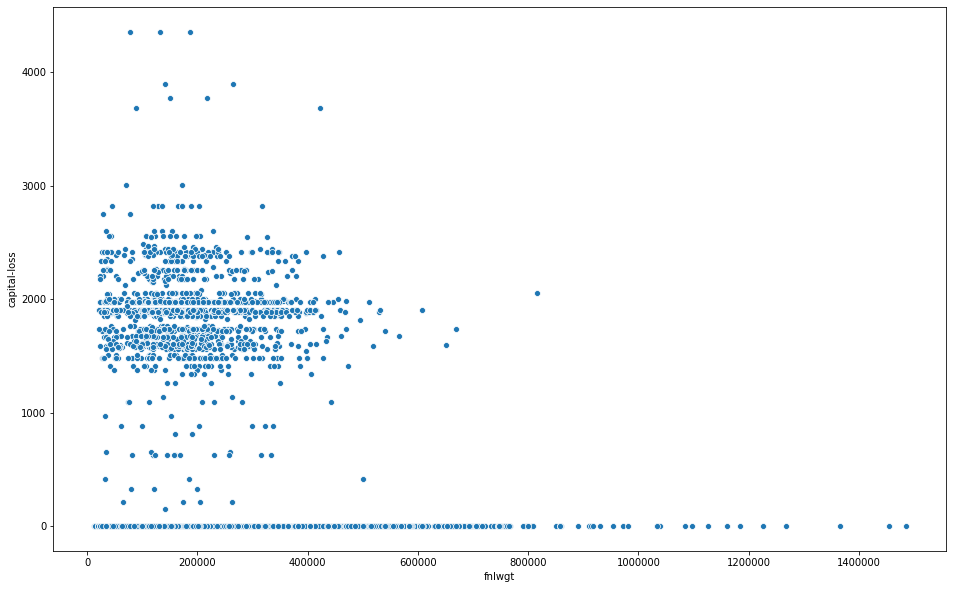

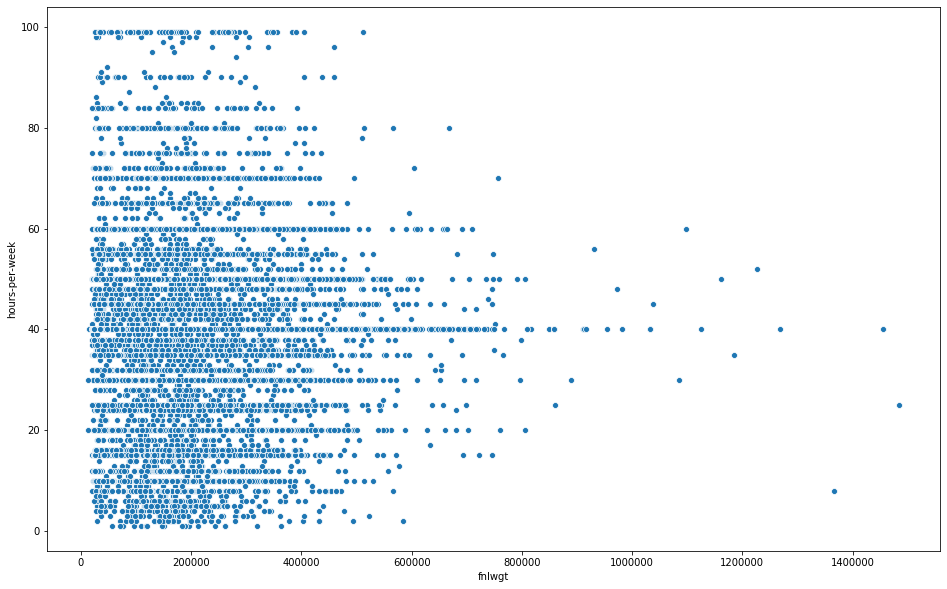

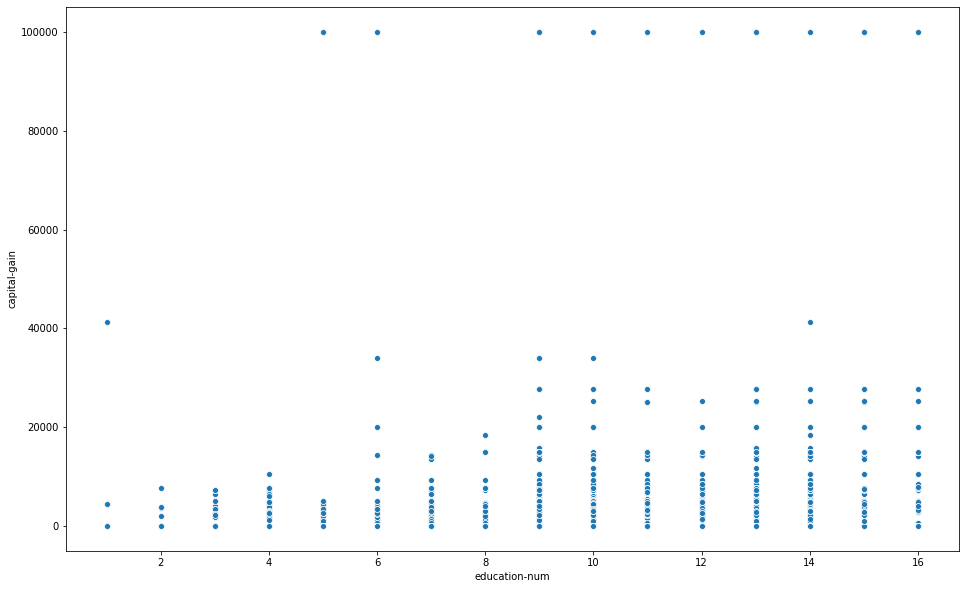

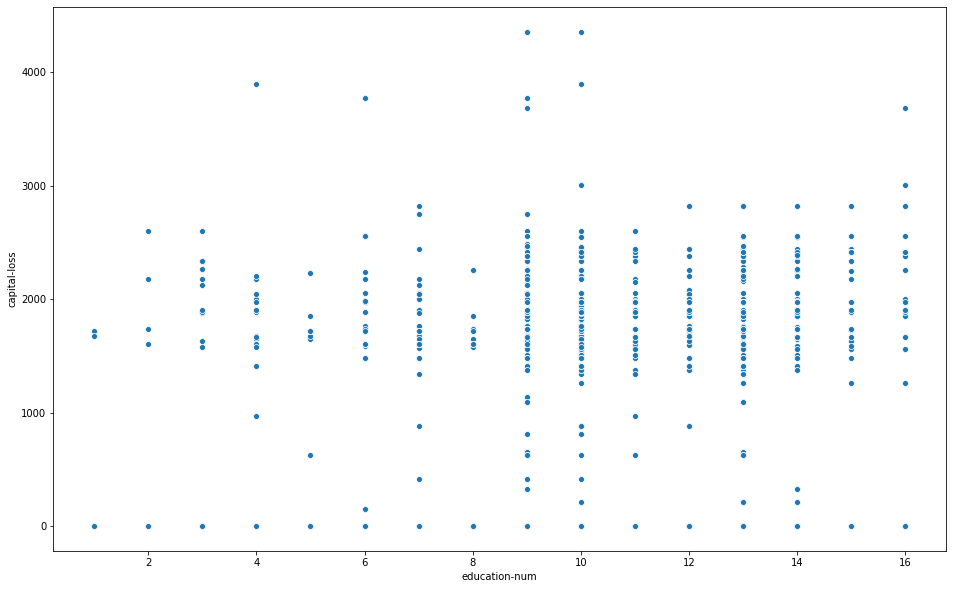

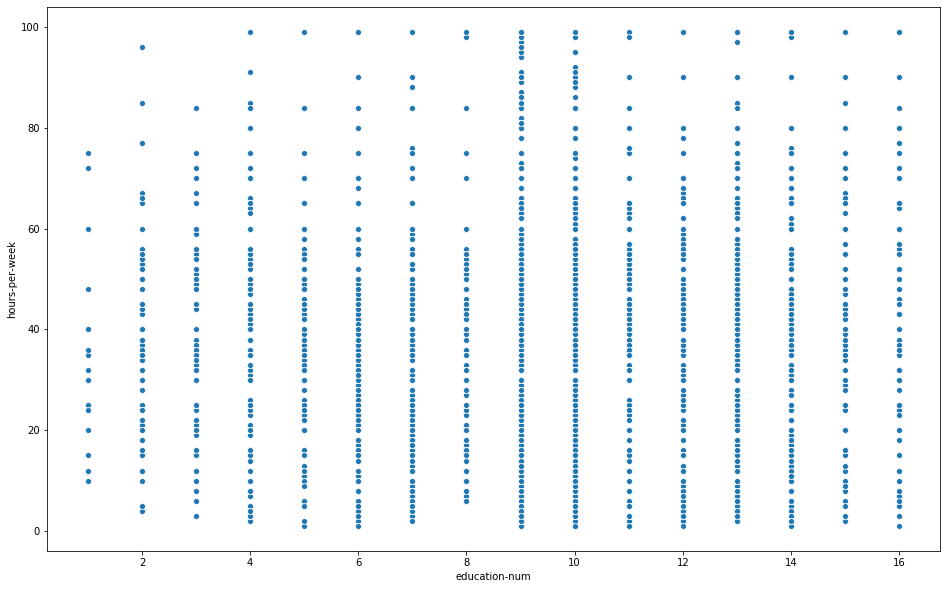

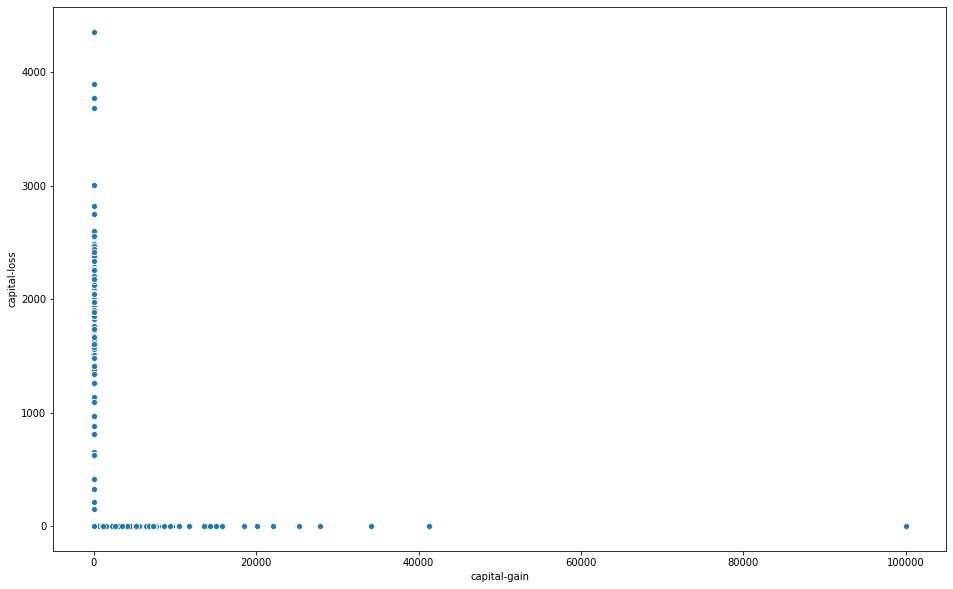

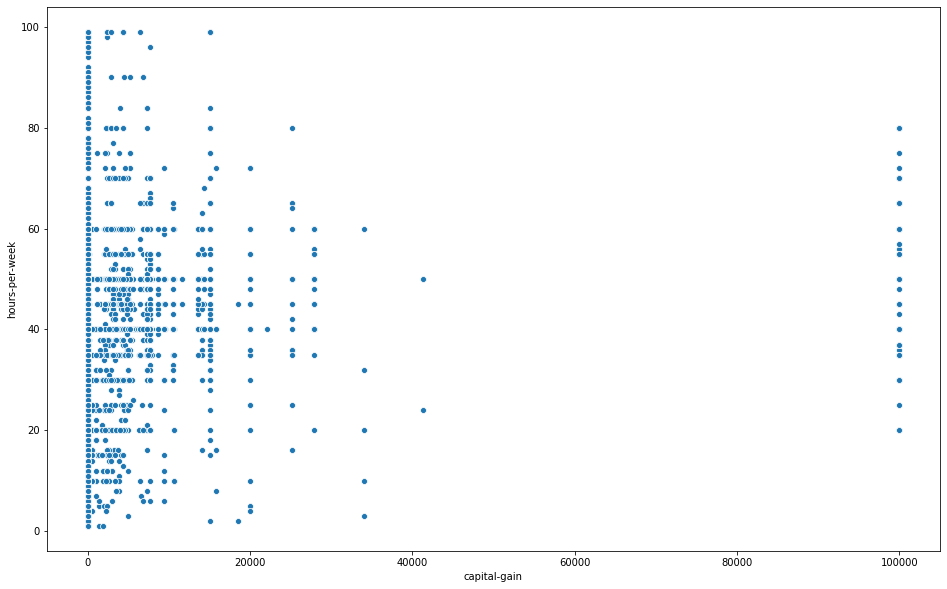

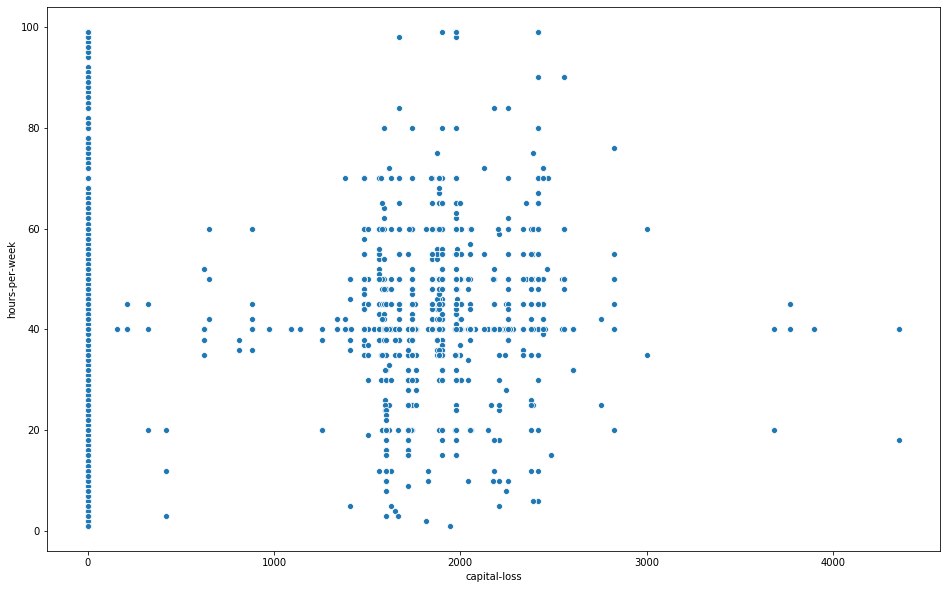

'\nInference for question 8 :\n\n1) Most of the age groups have less than 20000 of capital gain\n2) Most of the age groups have more than 1000 of capital loss\n3) There are a high number of people working for more than 40 hours a week\n'

In [6]:
####################################
#        Question 4 & 8            #
####################################
'''
4.For each pair of categorical variables, construct a cross tabulation. Discuss the results.

8.For each pair of numeric variables, construct a scatter plot of the variables. Discuss the results.

'''

categorical_variables = ["workclass","education", "marital-status","occupation","relationship","race"
    ,"sex","native-country"]

numerical_variables = ["age","fnlwgt", "education-num","capital-gain","capital-loss","hours-per-week"]

for catvar in range(len(categorical_variables)):
    for catvarinner in range(catvar+1,len(categorical_variables)):
        crossTab = pd.crosstab(df_load_features_raw[categorical_variables[catvar]], df_load_features_raw[categorical_variables[catvarinner]])
        print(crossTab)
'''
Inference for question 4 :

1) Most of the people are employed in private sector irrespective of other factors 
2) There is a max distribution of high school grads who are into repair jobs
3) THere are very few masters or doctorate across different occupation
4) High number of high school grads across different races
5) There are more males than females
6) Most of the people are white and have the maritial status of "Married-civ-spouse"
7) Most of the people are from United -states
8) Can see some data anamoly with 1 female registered as husband and 2 males registered as wives (Can be denominations for some same-sex relationships)
9) Nearly half of the entries are for white males
9) Some people with relationship 'Married-spouse-absent' have marital-status as 'unmarried' which is anamalous
'''
        
for numvar in range(len(numerical_variables)):
    for numvarinner in range(numvar+1,len(numerical_variables)):
        plt.figure(figsize=(16, 10))
        sn.scatterplot(data=df_load_features_raw,x=numerical_variables[numvar],y=numerical_variables[numvarinner])
        plt.show()
        
'''
Inference for question 8 :

1) Most of the age groups have less than 20000 of capital gain
2) Most of the age groups have more than 1000 of capital loss
3) There are a high number of people working for more than 40 hours a week
'''

In [7]:
####################################
#            Question 5            #
####################################
'''
5.Report on whether anomalous fields exist in this dataset, based on your EDA,
which are these fields and what should be done about it.

Ans: There are some fields which are anamalous in nature for example the relationship & marital-status feature 
where some males are registered as wives and some females are registered as husbands . They appear anamalous but 
more research needs to be done to find out whether these are same-sex relationships . Similarly Some people with 
relationship 'Married-spouse-absent' have marital-status as 'unmarried' which is anamalous hence its better to either ignore
or do some more research for these rows and find out whats the actual status. We also have missing data in workclass , native-country and occupation which are anamalous , hence we should 
replace these values with the mode since these are categorical in nature or do some more research and find out the actual 
values
'''

"\n5.Report on whether anomalous fields exist in this dataset, based on your EDA,\nwhich are these fields and what should be done about it.\n\nAns: There are some fields which are anamalous in nature for example the relationship & marital-status feature \nwhere some males are registered as wives and some females are registered as husbands . They appear anamalous but \nmore research needs to be done to find out whether these are same-sex relationships . Similarly Some people with \nrelationship 'Married-spouse-absent' have marital-status as 'unmarried' which is anamalous hence its better to either ignore\nor do some more research for these rows and find out whats the actual status. We also have missing data in workclass , native-country and occupation which are anamalous , hence we should \nreplace these values with the mode since these are categorical in nature or do some more research and find out the actual \nvalues\n"

In [8]:
####################################
#            Question 6            #
####################################
'''
Report the mean, median, minimum, maximum and standard deviation of each of the numeric variables
'''

numerical_variables = ["age","fnlwgt", "education-num","capital-gain","capital-loss","hours-per-week"]

for numvar in range(len(numerical_variables)):
    mean = df_load_features_raw[numerical_variables[numvar]].mean()
    median = df_load_features_raw[numerical_variables[numvar]].median()
    stddev = df_load_features_raw[numerical_variables[numvar]].std()
    maxval = df_load_features_raw[numerical_variables[numvar]].max()
    minval = df_load_features_raw[numerical_variables[numvar]].min()
    print('\nFor Numerical Variable {}: \n max = {}\n min = {}\n mean = {}\n median = {}\n standard deviation = {}'
          .format(numerical_variables[numvar],maxval,minval,mean,median,stddev))
      


For Numerical Variable age: 
 max = 90
 min = 17
 mean = 38.5890259280903
 median = 37.0
 standard deviation = 13.635737394451876

For Numerical Variable fnlwgt: 
 max = 1484705
 min = 12285
 mean = 189786.97819333806
 median = 178356.0
 standard deviation = 105561.1427838918

For Numerical Variable education-num: 
 max = 16
 min = 1
 mean = 10.082613108602713
 median = 10.0
 standard deviation = 2.5708830444319464

For Numerical Variable capital-gain: 
 max = 99999
 min = 0
 mean = 1079.172946206133
 median = 0.0
 standard deviation = 7390.625579039871

For Numerical Variable capital-loss: 
 max = 4356
 min = 0
 mean = 87.4327192200043
 median = 0.0
 standard deviation = 403.2435964028798

For Numerical Variable hours-per-week: 
 max = 99
 min = 1
 mean = 40.443207332451635
 median = 40.0
 standard deviation = 12.346348192045465


'\na.Discuss the relationship, if any, each of these variables has with the target variable.\nb.Which variables would you expect to make a significant appearance in any data mining classification model?\n\nAnswers\na.  Age ,hours per week , capital-gain , capital-loss , education-num has a postive relationship as in they help in increasing the income \n \n\nb. Age ,hours per week , capital-gain , capital-loss , education-num will have a significant impact on any classification model\n\n'

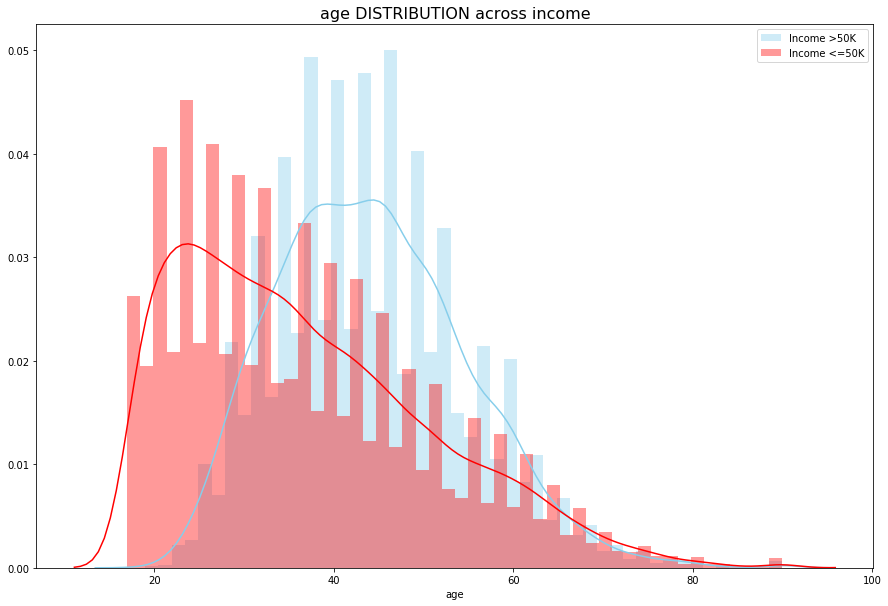

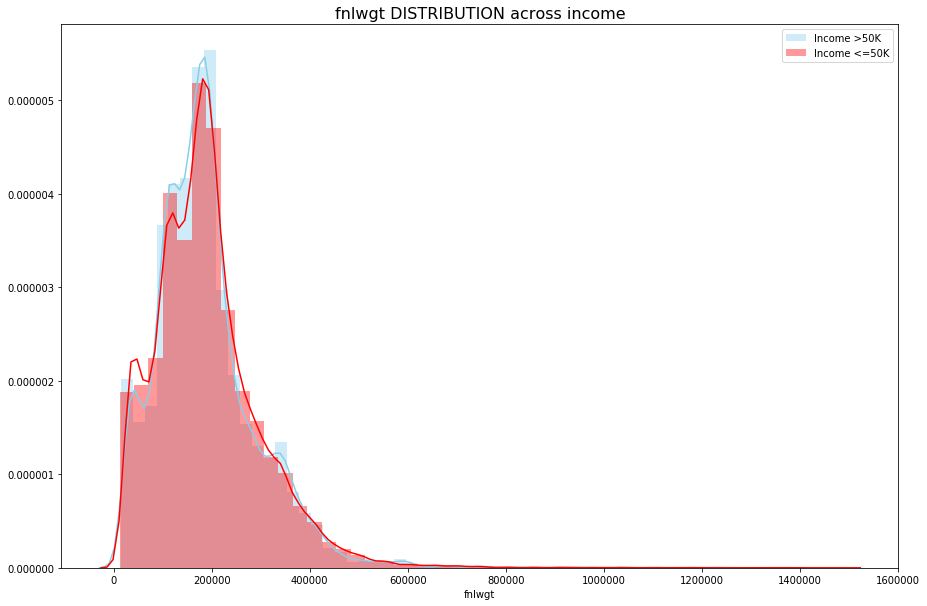

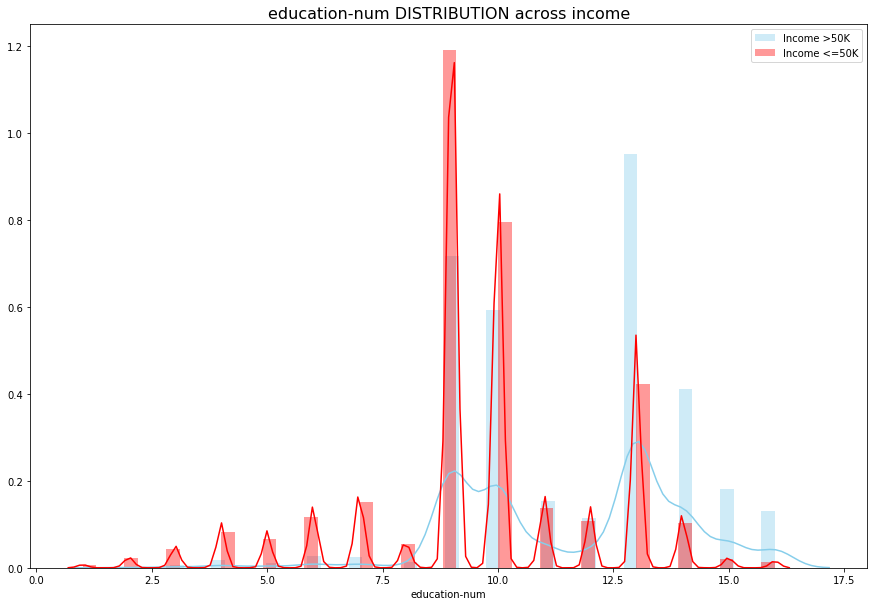

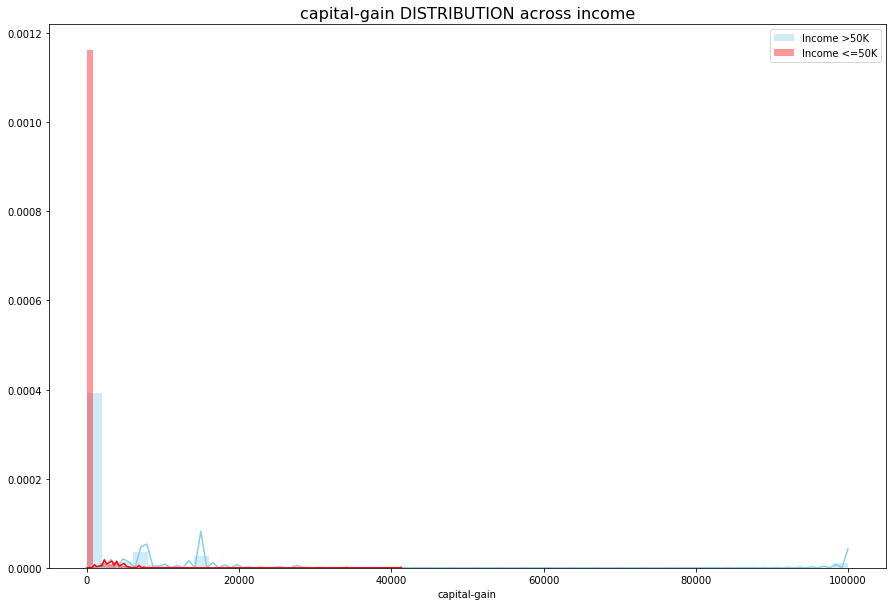

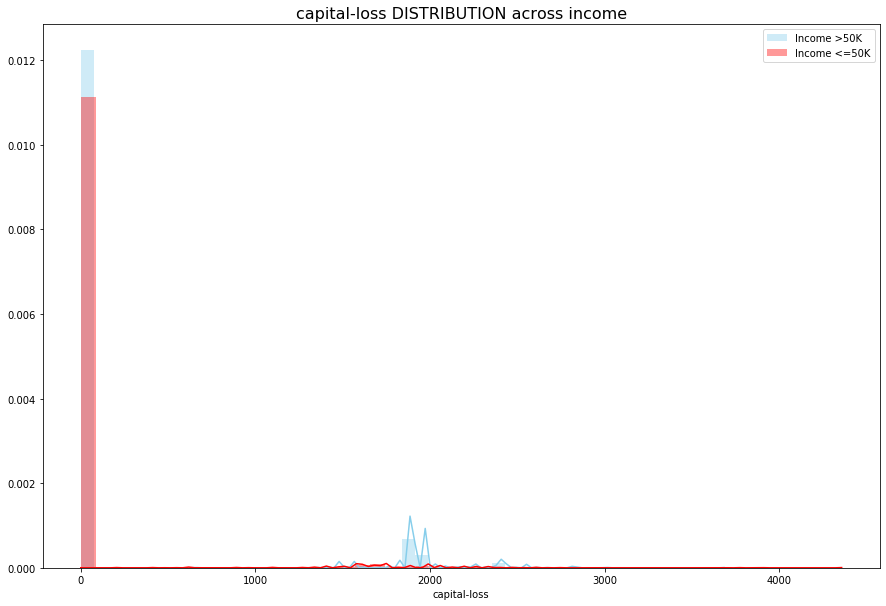

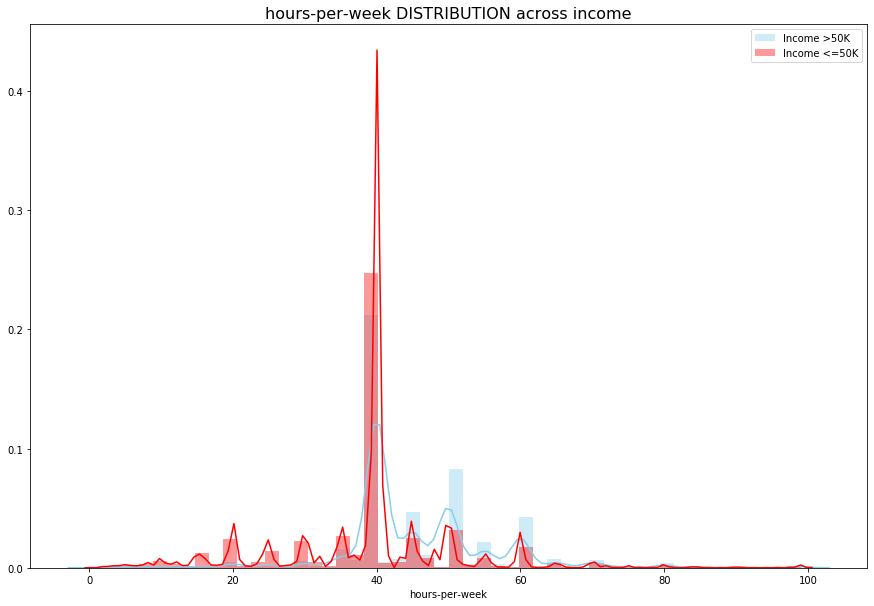

In [9]:
####################################
#            Question 7            #
####################################
'''
7.Construct a histogram of each numerical variables, with an overlay of the target variable income. 
'''

 ###### creating the Histogram plots for numerical variables vs income ######
    
tmp_df = df_load_features_raw.loc[:, ["age","fnlwgt", "education-num","capital-gain","capital-loss","hours-per-week"
                                      ,"income"]]
for column in tmp_df:
    if column!='income':
        rslt_df = tmp_df.loc[tmp_df['income'] == '>50K'] 
        rslt_df2 = tmp_df.loc[tmp_df['income'] == '<=50K'] 
        plt.figure(figsize=(15, 10))
        plt.title('{} DISTRIBUTION across income'.format(column), fontsize=16)
        sn.distplot( rslt_df[column] , color="skyblue", label="Income >50K")
        sn.distplot( rslt_df2[column] , color="red", label="Income <=50K")
        plt.legend()

        
'''
a.Discuss the relationship, if any, each of these variables has with the target variable.
b.Which variables would you expect to make a significant appearance in any data mining classification model?

Answers
a.  Age ,hours per week , capital-gain , capital-loss , education-num has a postive relationship as in they help in increasing the income 
 

b. Age ,hours per week , capital-gain , capital-loss , education-num will have a significant impact on any classification model

'''


In [10]:
####################################
#            Question 9            #
####################################
'''
9.Based on your EDA so far, identify the interesting sub-groups of records 
within the dataset that would be worth further investigation.

Ans: There are some fields which are anamalous in nature for example the relationship & marital-status feature 
where some males are registered as wives and some females are registered as husbands . They appear anamalous but 
more research needs to be done to find out whether these are same-sex relationships . Similarly Some people with 
relationship 'Married-spouse-absent' have marital-status as 'unmarried' which is anamalous hence its better to either ignore
or do some more research for these rows and find out whats the actual status. We also have missing data in workclass , native-country and occupation which are anamalous , hence we should 
replace these values with the mode since these are categorical in nature or do some more research and find out the actual 
values
'''

"\n9.Based on your EDA so far, identify the interesting sub-groups of records \nwithin the dataset that would be worth further investigation.\n\nAns: There are some fields which are anamalous in nature for example the relationship & marital-status feature \nwhere some males are registered as wives and some females are registered as husbands . They appear anamalous but \nmore research needs to be done to find out whether these are same-sex relationships . Similarly Some people with \nrelationship 'Married-spouse-absent' have marital-status as 'unmarried' which is anamalous hence its better to either ignore\nor do some more research for these rows and find out whats the actual status. We also have missing data in workclass , native-country and occupation which are anamalous , hence we should \nreplace these values with the mode since these are categorical in nature or do some more research and find out the actual \nvalues\n"

In [11]:
####################################
#            Question 10           #
####################################

'''
Summarize your salient EDA findings from the above exercises, just as if you were writing a report


EDA Analysis 

1) We do have many missing and null values which need to be handled as per the code in the notebook above

2) There are repeated rows which should be ommitted from analysis 

3) There are a lot of categorical variables which need to be converted to numeric for better analysis

4) Some of the features like fnlwgt , education ,occupation , race and native country do not affect the target variable
   and can be ommitted from the final model
   
5) The data is very lop sided towards race - white and workclass - private 

6) There are anamalous data present in relationship & marital status which need to be checked

7) From the outliers we can see that the average working hours per week for people earning more than 50K is more . 
   Similarly they seem to have higher qualifications than people earning <50K

8) Overall the data will need some more deep dive and 2nd level of research or cold calls need to be done to get the required
   information for building a better model

'''

'\nSummarize your salient EDA findings from the above exercises, just as if you were writing a report\n\n\nEDA Analysis \n\n1) We do have many missing and null values which need to be handled as per the code in the notebook above\n\n2) There are repeated rows which should be ommitted from analysis \n\n3) There are a lot of categorical variables which need to be converted to numeric for better analysis\n\n4) Some of the features like fnlwgt , education ,occupation , race and native country do not affect the target variable\n   and can be ommitted from the final model\n   \n5) The data is very lop sided towards race - white and workclass - private \n\n6) There are anamalous data present in relationship & marital status which need to be checked\n\n7) From the outliers we can see that the average working hours per week for people earning more than 50K is more . \n   Similarly they seem to have higher qualifications than people earning <50K\n\n8) Overall the data will need some more deep di

In [12]:
#############################################################################################
#                                    Overall Run time                                       #
#############################################################################################

endTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())
print ("Run started at : ",startTime)
print ("Run ended at : ",endTime)

Run started at :  Mon, 04 Jan 2021 06:37:33 +0000
Run ended at :  Mon, 04 Jan 2021 06:37:50 +0000
